In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import numpy as np
import os
import random
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import load_model
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator

Mounted at /content/drive


In [ ]:
# Load the saved model
model = load_model('/content/drive/MyDrive/Colab Notebooks/EE4062_project/saved_model/my_model_1')

In [ ]:
def create_image_dataframe(images_dir):
    data = []
    for filename in os.listdir(images_dir):
        if filename.endswith('.jpg'):
            label = '_'.join(filename.split('_')[:-1])
            data.append((filename, label))
    return pd.DataFrame(data, columns=['filename', 'label'])

images_dir = '/content/drive/MyDrive/Colab Notebooks/EE4062_project/dataset/Train'
df = create_image_dataframe(images_dir)

# Split into test set only
_, test_df = train_test_split(df, test_size=0.2, stratify=df['label'], random_state=42)

# Create test data generator
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_dataframe(
    test_df,
    directory=images_dir,
    x_col='filename',
    y_col='label',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

Found 354 validated image filenames belonging to 11 classes.


In [42]:
# Plot the histogram
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='label', discrete=True, shrink=0.8, palette='viridis')
plt.xticks(rotation=90)
plt.title('Distribution of Micro-organism Types')
plt.xlabel('Micro-organism Type')
plt.ylabel('Count')

# Save the plot to a file
output_path = '/content/drive/MyDrive/Colab Notebooks/EE4062_project/test_output/histogram_plot.png'
plt.savefig(output_path, bbox_inches='tight')
plt.close()

print(f"Histogram saved to {output_path}")

<ipython-input-42-6f93ef58a326>:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=df, x='label', discrete=True, shrink=0.8, palette='viridis')


Histogram saved to /content/drive/MyDrive/Colab Notebooks/EE4062_project/test_output/histogram_plot.png


In [47]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.metrics import classification_report, confusion_matrix

# Evaluate on the test set
Y_pred = model.predict(test_generator)
y_pred = np.argmax(Y_pred, axis=1)

# Generate the confusion matrix
cm = confusion_matrix(test_generator.classes, y_pred)

# Generate the classification report
target_names = list(test_generator.class_indices.keys())
report = classification_report(test_generator.classes, y_pred, target_names=target_names, output_dict=True)
report_df = pd.DataFrame(report).transpose()
report_df = report_df.round(2)  # Round the results to 2 decimal places

print('Classification Report')
print(report_df)

# Plot and save the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=target_names, yticklabels=target_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')

conf_matrix_output_path = '/content/drive/MyDrive/Colab Notebooks/EE4062_project/test_output/confusion_matrix.png'
plt.savefig(conf_matrix_output_path, bbox_inches='tight')
plt.close()

print(f"Confusion Matrix saved to {conf_matrix_output_path}")

# Plot and save the classification report table
fig, ax = plt.subplots(figsize=(12, 8))  # set size frame
ax.axis('tight')
ax.axis('off')
table = ax.table(cellText=report_df.values, colLabels=report_df.columns, rowLabels=report_df.index, cellLoc='center', loc='center', colColours=["#f5f5f5"]*report_df.shape[1])
table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1.2, 1.2)  # scale size of table

table_output_path = '/content/drive/MyDrive/Colab Notebooks/EE4062_project/test_output/classification_report.png'
plt.savefig(table_output_path, bbox_inches='tight', dpi=300)
plt.close()

print(f"Classification report table saved to {table_output_path}")

12/12 [==============================] - 11s 831ms/step
Classification Report
                            precision  recall  f1-score  support
Amoeba                           0.99    1.00      1.00   192.00
Colsterium_ehrenbergii           0.71    0.81      0.76    21.00
Cylindrocystis_brebissonii       0.86    0.57      0.69    21.00
Lepocinclis_spirogyroides        1.00    0.85      0.92    20.00
Micrasterias_rotata              0.87    0.76      0.81    17.00
Paramecium_bursaria              1.00    0.50      0.67     4.00
Peridinium_spec                  0.56    0.90      0.69    10.00
Pinnularia_neomajor              0.50    0.55      0.52    11.00
Pleurotaenium_ehrenbergii        0.67    0.56      0.61    18.00
Pyrocystis_lunula                0.55    0.60      0.57    20.00
Volvox_tertius                   0.83    1.00      0.91    20.00
accuracy                         0.88    0.88      0.88     0.88
macro avg                        0.78    0.74      0.74   354.00
weighted avg

In [20]:
def load_and_preprocess_image(img_path, target_size=(224, 224)):
    img = load_img(img_path, target_size=target_size)
    img_array = img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)  # Expand dims to fit model input shape
    return img_array

def classify_image(model, img_path, class_indices):
    img_array = load_and_preprocess_image(img_path)
    prediction = model.predict(img_array)
    predicted_class = np.argmax(prediction, axis=1)[0]
    class_labels = {v: k for k, v in class_indices.items()}
    return class_labels[predicted_class]

1/1 [==============================] - 0s 26ms/step
Real Label: Amoeba
Predicted Label: Amoeba


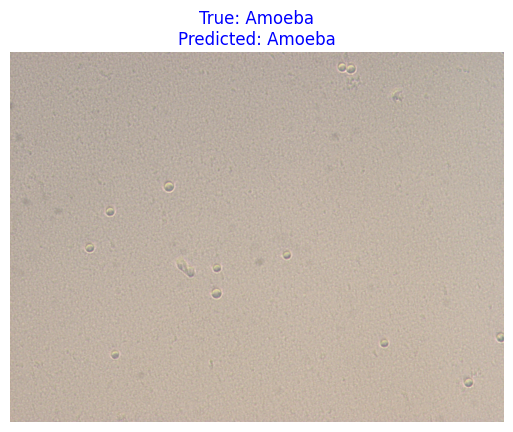

Annotated image saved to /content/drive/MyDrive/Colab Notebooks/EE4062_project/test_output/Amoeba_true_529.png


In [28]:
def classify_random_test_image(model, test_df, images_dir, class_indices):
    # Choose a random image from the test set
    random_index = random.randint(0, len(test_df) - 1)
    test_image = test_df.iloc[random_index]
    img_path = os.path.join(images_dir, test_image['filename'])
    real_label = test_image['label']

    # Classify the image
    predicted_label = classify_image(model, img_path, class_indices)

    # Determine if the classification is correct or not
    is_correct = (real_label == predicted_label)
    result = "true" if is_correct else "false"

    # Print the results
    print(f"Real Label: {real_label}")
    print(f"Predicted Label: {predicted_label}")

    # Display the image with annotations
    img = load_img(img_path)
    plt.imshow(img)
    plt.axis('off')
    plt.title(f"True: {real_label}\nPredicted: {predicted_label}", fontsize=12, color='blue', loc='center')

    # Save the image to a file
    image_id = os.path.basename(img_path).split('_')[-1].split('.')[0]  # Extract image ID from the filename
    output_filename = f"{real_label}_{result}_{image_id}.png"
    output_path = os.path.join('/content/drive/MyDrive/Colab Notebooks/EE4062_project/test_output', output_filename)
    plt.savefig(output_path, bbox_inches='tight')
    plt.show()

    print(f"Annotated image saved to {output_path}")

# Example usage
classify_random_test_image(model, test_df, images_dir, test_generator.class_indices)

1/1 [==============================] - 0s 34ms/step
Real Label: Volvox_tertius
Predicted Label: Volvox_tertius


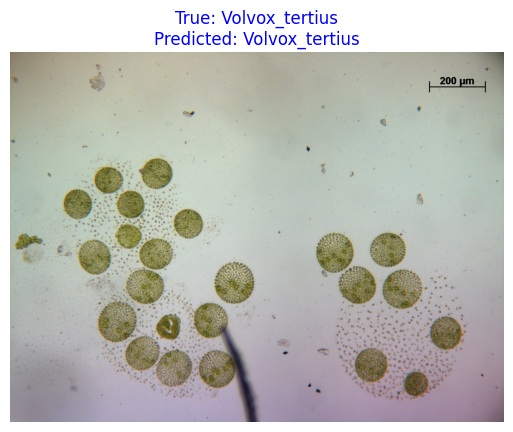

Annotated image saved to /content/drive/MyDrive/Colab Notebooks/EE4062_project/test_output/Volvox_tertius_true_019.png


In [39]:
def classify_provided_test_image(model, img_path, real_label, class_indices):
    # Classify the image
    predicted_label = classify_image(model, img_path, class_indices)

    # Determine if the classification is correct or not
    is_correct = (real_label == predicted_label)
    result = "true" if is_correct else "false"

    # Print the results
    print(f"Real Label: {real_label}")
    print(f"Predicted Label: {predicted_label}")

    # Display the image with annotations
    img = load_img(img_path)
    plt.imshow(img)
    plt.axis('off')
    plt.title(f"True: {real_label}\nPredicted: {predicted_label}", fontsize=12, color='blue', loc='center')

    # Save the image to a file
    image_id = os.path.basename(img_path).split('_')[-1].split('.')[0]  # Extract image ID from the filename
    output_filename = f"{real_label}_{result}_{image_id}.png"
    output_path = os.path.join('/content/drive/MyDrive/Colab Notebooks/EE4062_project/test_output', output_filename)
    plt.savefig(output_path, bbox_inches='tight')
    plt.show()

    print(f"Annotated image saved to {output_path}")

# Example usage
provided_img_path = '/content/drive/MyDrive/Colab Notebooks/EE4062_project/dataset/Train/Volvox_tertius_019.jpg'  # Replace with the path to your image
provided_real_label = 'Volvox_tertius'  # Replace with the real label of the provided image
classify_provided_test_image(model, provided_img_path, provided_real_label, test_generator.class_indices)